<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Automatizacion_ENOE/blob/main/Analisis%20de%20Datos%20con%20Python/Sesion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 2: Visualización de Datos con Seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto melbourne_housing-clean.csv', index_col = 0)
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Boxplot

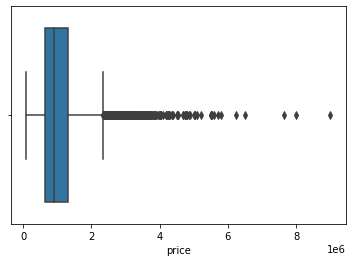

In [ ]:
# Grafico de boxplot
sns.boxplot(x = df['price']);
#colocamos x si queremos el grafico en horixzontal, y si lo queremos en vertical
# Nota, con';' evitamos el mensaje previo del codigo

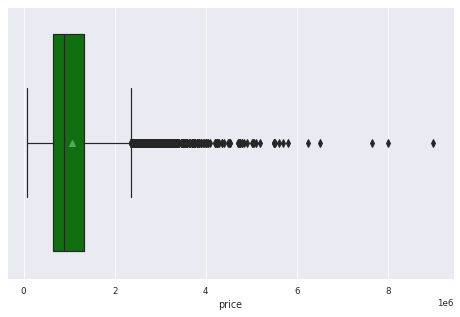

In [ ]:
# Establecemos el estilo del grafico
# Contexto: Fuente, tamaño, size... [notebook, paper, talk, poster]
sns.set(context = 'paper', style = 'darkgrid')

# Para el tamaño de la grafica
plt.figure(figsize = (8,5))

# Graficamos
sns.boxplot(x = df['price'], showmeans = True, color = "green"); 

# Guardamos
# plt.savefig('figura.png')

In [ ]:
# Rango intercuartilico
iqr = df['price'].quantile(.75) - df['price'].quantile(.25)
filtro_inferior = df['price'] > df['price'].quantile(.25)- (iqr*1.5)
filtro_superior = df['price'] < df['price'].quantile(.75) + (iqr*1.5)

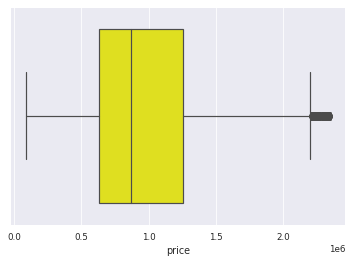

In [ ]:
# Graficamos lo anterior
df_filtrado = df[filtro_inferior & filtro_superior]
sns.boxplot(x = df_filtrado['price'], color = 'yellow');

### Histograma

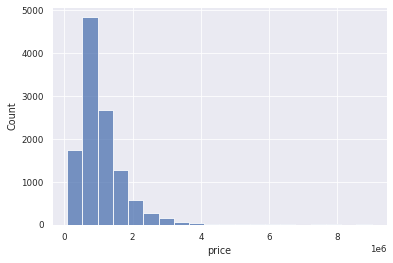

In [47]:
sns.histplot(data = df, x = 'price', bins = 20);

In [48]:
import numpy as np
from scipy.stats import skew, kurtosis

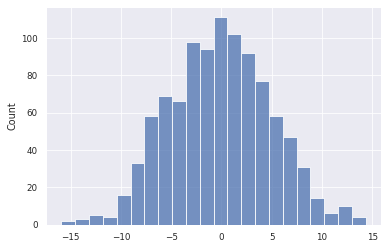

In [51]:
# Creamos una normal centrada en cero 
normal = np.random.normal(loc = 0, scale = 5, size = 1000)
sns.histplot(normal);

In [53]:
print(f'Curtosis:{kurtosis(normal)}')
print(f'Asimetria: {skew(normal)}')

Curtosis:-0.18765436770039212
Asimetria: 0.03797332116085883


In [54]:
# Distribuciones de cola corta
cola_corta = np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8])

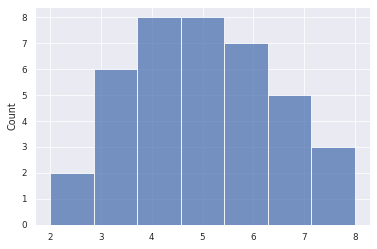

In [56]:
sns.histplot(cola_corta, bins=7);

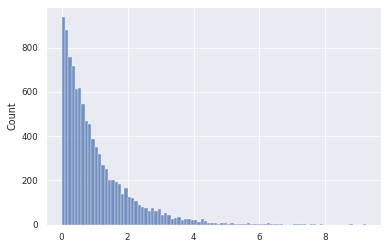

In [61]:
# Asimetria positiva
asimetria_positiva = np.random.exponential(scale=1.0, size=10000)
sns.histplot(asimetria_positiva);

In [62]:
print(f'Curtosis: {kurtosis(asimetria_positiva)}')
print(f'Asimetría: {skew(asimetria_positiva)}')

Curtosis: 5.752742313619233
Asimetría: 1.9926136393053433


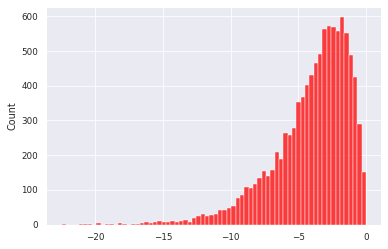

In [70]:
#Asimetría negativa
asimetria_negativa = np.random.chisquare(4, size=10000) * -1
sns.histplot(asimetria_negativa, color = 'red');

In [65]:
print(f'Curtosis: {kurtosis(asimetria_negativa)}')
print(f'Asimetría: {skew(asimetria_negativa)}')

Curtosis: 2.6748753562191414
Asimetría: -1.385299151367235


In [66]:
# Distribución bimodal y multimodal
normal_left = np.random.normal(loc=-2.5, scale=1, size=10000)
normal_right = np.random.normal(loc=2.5, scale=1, size=10000)
bimodal = np.concatenate([normal_left, normal_right])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


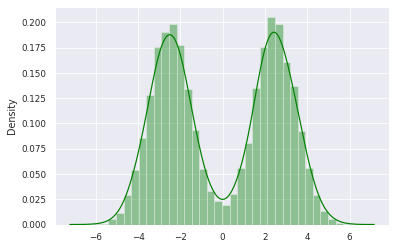

In [72]:
sns.distplot(bimodal,color = 'green');

In [68]:
print(f'Curtosis: {kurtosis(bimodal)}')
print(f'Asimetría: {skew(bimodal)}')

Curtosis: -1.4922255066854573
Asimetría: -0.001257702415095632
